<a href="https://colab.research.google.com/github/Anish32/mental_health-detection/blob/main/mental_health_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CRISP-ML(Q)** Methodology

**Business and Data Understanding**

**Data importing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/MentalHealth_risk_identification.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
print(len(df))
df["Treatment"]=df["Treatment"].map({"Yes": 1, "No": 0})
df.head()
df

2087


,Age,Gender,Work Hours,Family History,Sleep Hours,Stress Level,Physical Activity,Social Interaction,Diet Quality,Treatment
0,79,Male,20,Yes,7,7,24,2,Average,1
1,20,Others,31,No,8,7,2,2,Average,0
2,40,Male,39,No,8,4,7,8,Good,1
3,35,Female,66,Yes,7,10,40,2,Average,1
4,81,Female,42,Yes,6,2,78,2,Good,1
...,...,...,...,...,...,...,...,...,...,...
2082,63,Male,38,No,7,0,61,5,Good,0
2083,96,Female,34,No,6,9,97,1,Average,1
2084,25,Male,62,Yes,7,7,138,2,Poor,1
2085,96,Female,65,Yes,4,9,76,7,Poor,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 2087 non-null   int64 
 1   Gender              2087 non-null   object
 2   Work Hours          2087 non-null   int64 
 3   Family History      2087 non-null   object
 4   Sleep Hours         2087 non-null   int64 
 5   Stress Level        2087 non-null   int64 
 6   Physical Activity   2087 non-null   int64 
 7   Social Interaction  2087 non-null   int64 
 8   Diet Quality        2087 non-null   object
 9   Treatment           2087 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 163.2+ KB


In [ ]:
df[df.duplicated()]

,Age,Gender,Work Hours,Family History,Sleep Hours,Stress Level,Physical Activity,Social Interaction,Diet Quality,Treatment


In [ ]:
df["Stress Level"].describe()

,Stress Level
count,2087.000000
mean,4.978917
std,3.156441
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [ ]:
df['Social Interaction'].describe()

,Social Interaction
count,2087.000000
mean,4.941543
std,3.209142
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality', 'Treatment'],
      dtype='object')

In [ ]:
df.columns

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality', 'Treatment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 2087 non-null   int64 
 1   Gender              2087 non-null   object
 2   Work Hours          2087 non-null   int64 
 3   Family History      2087 non-null   object
 4   Sleep Hours         2087 non-null   int64 
 5   Stress Level        2087 non-null   int64 
 6   Physical Activity   2087 non-null   int64 
 7   Social Interaction  2087 non-null   int64 
 8   Diet Quality        2087 non-null   object
 9   Treatment           2087 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 163.2+ KB


**Univariate Analysis**

<Axes: >

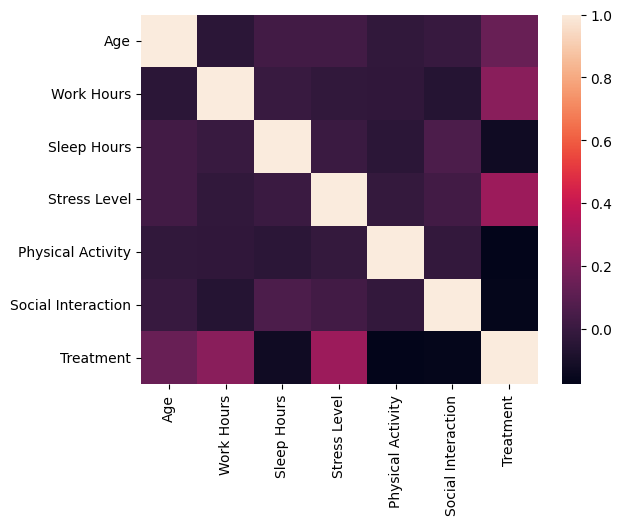

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Treatment', ylabel='count'>

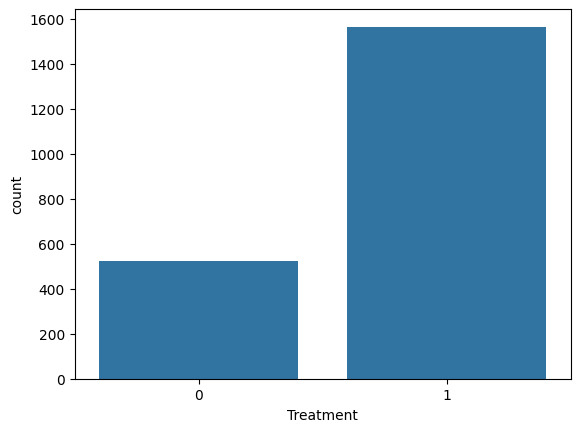

In [ ]:
sns.countplot(x=df['Treatment'])

<Axes: xlabel='Age', ylabel='Count'>

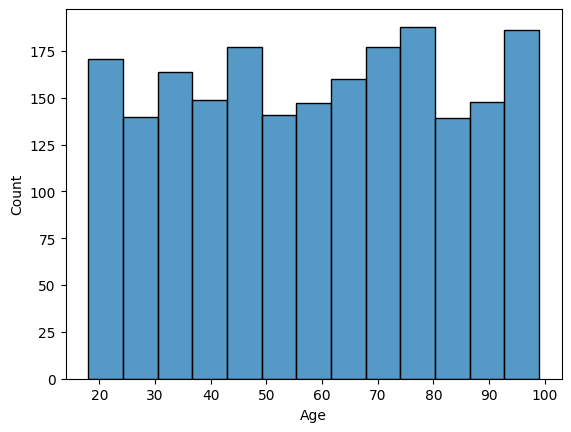

In [ ]:
sns.histplot(x=df['Age'])

- The age distribution is looks like almost following the uniform distribution
- The minimum age is 18-20
- The maximum age is 95-98

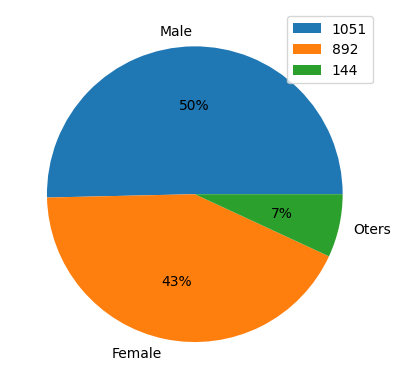

In [ ]:
plt.pie(df['Gender'].value_counts(),autopct="%1.f%%",labels=["Male","Female","Oters"])
plt.legend(df['Gender'].value_counts())

Half of the participants in this dataset are male, while the other half include females and individuals of other gender identities.

<Axes: xlabel='Sleep Hours', ylabel='Count'>

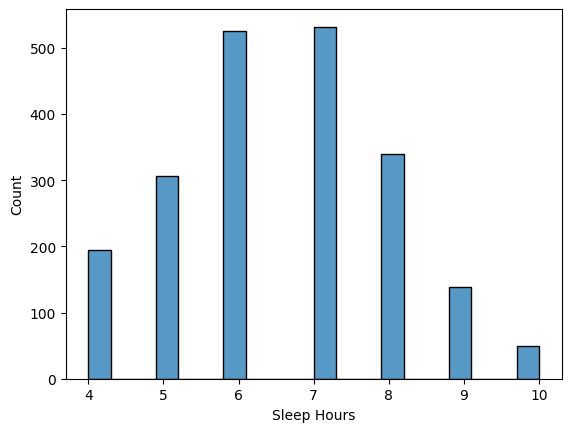

In [ ]:
sns.histplot(df['Sleep Hours'])

Here the Sleeping hours are following the normal distribution

<Axes: xlabel='Social Interaction', ylabel='Count'>

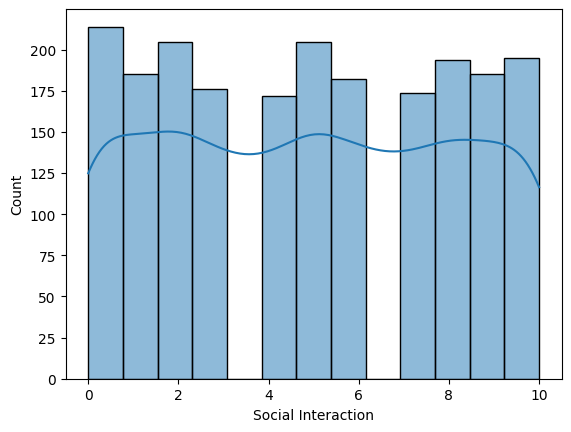

In [ ]:
sns.histplot(df['Social Interaction'],kde=True)

People's social Interaction is almost following the uniform distribution

<Axes: ylabel='Work Hours'>

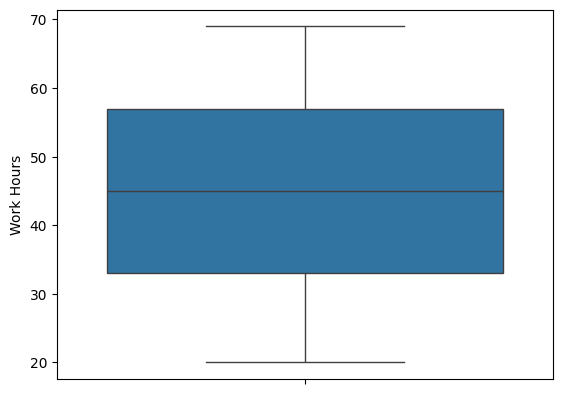

In [ ]:
sns.boxplot(df['Work Hours'])

<Axes: xlabel='Physical Activity', ylabel='Count'>

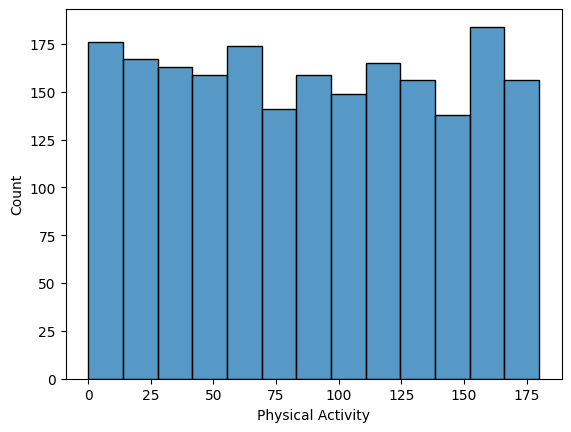

In [ ]:
sns.histplot(x=df['Physical Activity'])

People's Pysical activity timing's are following the uniform distribution


**Bi-Variate Analysis**

<Axes: xlabel='Age', ylabel='Count'>

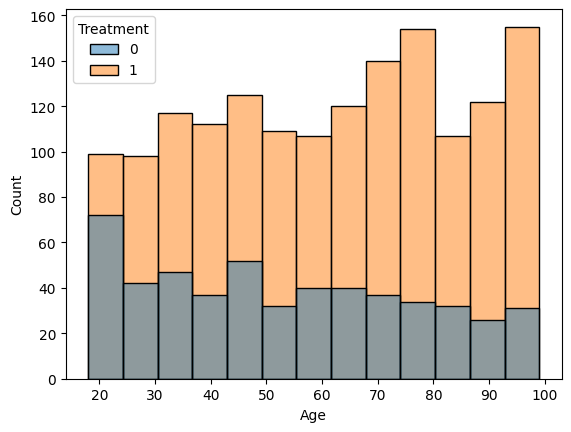

In [ ]:
sns.histplot(x=df['Age'],hue=df["Treatment"])

Older age groups show a significantly higher count of individuals seeking treatment, while the group not requiring treatment appears steady and much smaller in comparison.

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality', 'Treatment'],
      dtype='object')

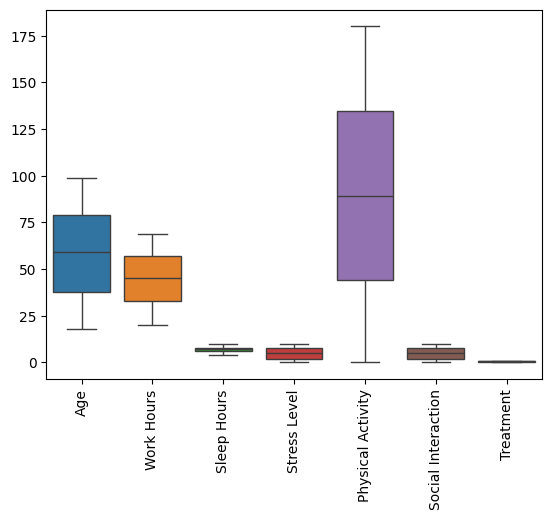

In [ ]:
sns.boxplot(df[df.columns])
plt.xticks(rotation=90)
df.columns

<!-- - If we check here there is no outliers in the data so we don't need to applying any outlier's handling techniques
- from the input columns the sleep hours distributions is less and the physical activity distribution is very huge compared to the remaining input features  -->


✅ No significant outliers are observed across the features, so there’s no immediate need for outlier handling techniques like trimming or winsorization.

📊 Among the input features:

Sleep Hours shows a narrow distribution, indicating consistency in how much people sleep.

Physical Activity has a wide spread, showing high variability. This suggests people have very different levels of physical activity, which might be an important factor to consider in the analysis.

In [ ]:
df['Work Hours'].corr(df['Stress Level'])

np.float64(-0.02456960585343202)

<Axes: xlabel='Work Hours', ylabel='Stress Level'>

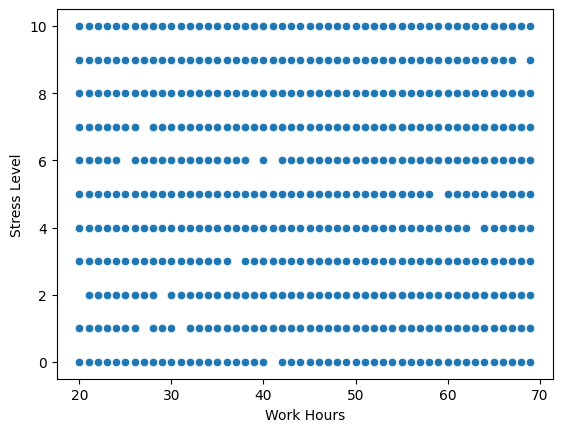

In [ ]:
sns.scatterplot(x=df['Work Hours'],y=df['Stress Level'])

The correlation between the working hours and stress levels is **-0.02456960585343206** so there is very less relation ship is there betweent these two may be only working hours are not effecting the stress levels

In [ ]:
df['Sleep Hours'].corr(df['Stress Level'])

np.float64(0.004268916737674395)

<Axes: xlabel='Sleep Hours', ylabel='Stress Level'>

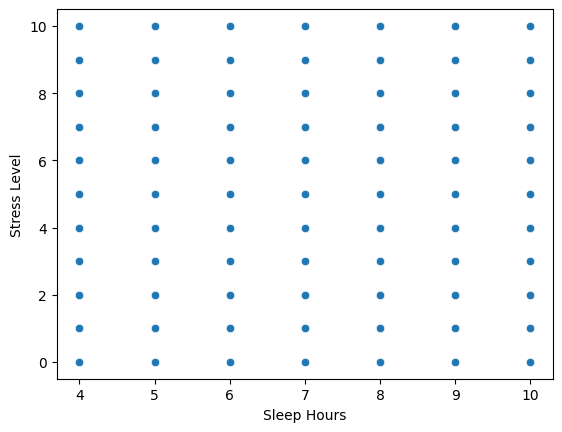

In [ ]:
sns.scatterplot(x=df['Sleep Hours'],y=df['Stress Level'])

The correlation betweeen the sleeping hours and stress levels is **0.004268916737674356** very low so there is very less correlation between these two features


<Axes: >

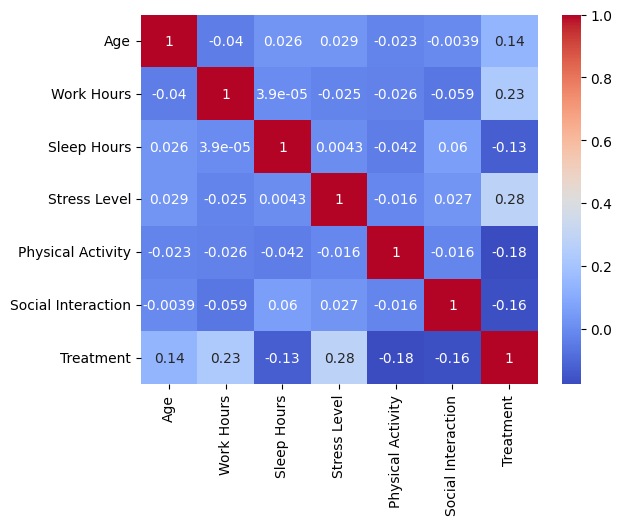

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm")

<Axes: xlabel='Diet Quality,Gender,Treatment'>

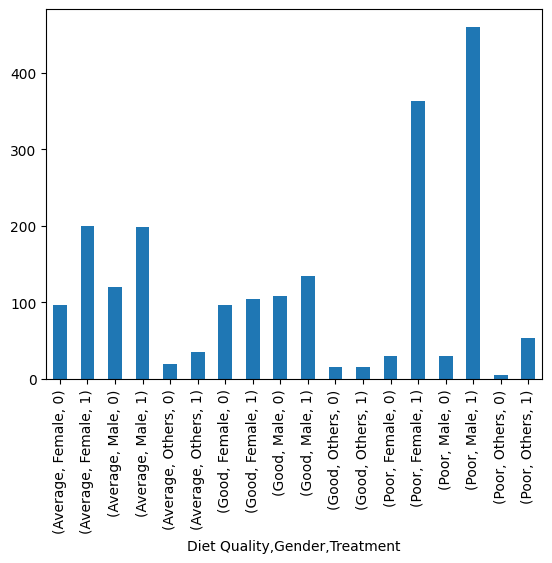

In [ ]:
df.groupby(["Diet Quality",'Gender','Treatment'])['Treatment'].count().plot(kind="bar")

<!-- here poor diet maintaining male people are taking the more treatment no only males females also who are not maintaining the proper diet they are also need the treatment means diet is causing the more effective to the mental health  -->

👨‍⚕️ Males with poor diet quality represent the largest group seeking treatment, highlighting a strong link between poor nutrition and mental health issues.

👩‍⚕️ Females with poor diets also show a high number of treatment seekers, reinforcing the impact of diet across genders.

✅ This trend strongly suggests that diet quality is a key factor influencing mental health, and maintaining a healthy diet may reduce the likelihood of needing mental health treatment.

<Axes: xlabel='Family History,Treatment'>

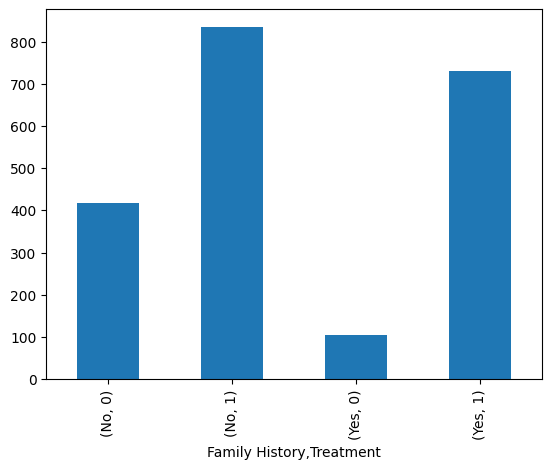

In [ ]:
df.groupby(['Family History','Treatment'])['Treatment'].count().plot(kind='bar')

The plot suggests no strong relationship between family history and treatment, as many individuals without a family history still seek mental health support.

In [ ]:
df.columns

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality', 'Treatment'],
      dtype='object')

In [ ]:
df.head()

,Age,Gender,Work Hours,Family History,Sleep Hours,Stress Level,Physical Activity,Social Interaction,Diet Quality,Treatment
0,79,Male,20,Yes,7,7,24,2,Average,1
1,20,Others,31,No,8,7,2,2,Average,0
2,40,Male,39,No,8,4,7,8,Good,1
3,35,Female,66,Yes,7,10,40,2,Average,1
4,81,Female,42,Yes,6,2,78,2,Good,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
import xgboost
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
knn=KNeighborsClassifier()
log=LogisticRegression(max_iter=1000)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()
xgb=xgboost.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)

In [ ]:
x=df.drop('Treatment',axis=1)
y=df['Treatment']

In [ ]:
df.columns

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality', 'Treatment'],
      dtype='object')

### Data Encoding

In [ ]:
nominal=['Gender','Family History']
ordinal=['Diet Quality']

In [ ]:
ord_p=Pipeline([("ordnal",OrdinalEncoder())])
nom_p=Pipeline([("nomianl",OneHotEncoder())])

In [ ]:
pip=ColumnTransformer([("ord",ord_p,ordinal),('nominal',nom_p,nominal)],remainder="passthrough")

In [ ]:
pip

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord',
                                 Pipeline(steps=[('ordnal', OrdinalEncoder())]),
                                 ['Diet Quality']),
                                ('nominal',
                                 Pipeline(steps=[('nomianl', OneHotEncoder())]),
                                 ['Gender', 'Family History'])])

In [ ]:
print(x.columns)

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality'],
      dtype='object')


In [ ]:
x=pip.fit_transform(x)

In [ ]:
df.drop('Treatment',axis=1).head(1)

,Age,Gender,Work Hours,Family History,Sleep Hours,Stress Level,Physical Activity,Social Interaction,Diet Quality
0,79,Male,20,Yes,7,7,24,2,Average


In [ ]:
x[0]

array([ 0.,  0.,  1.,  0.,  0.,  1., 79., 20.,  7.,  7., 24.,  2.])

In [ ]:
ord_features = ordinal
nom_features = pip.named_transformers_['nominal'].named_steps['nomianl'].get_feature_names_out(nominal)

passthrough_columns = [
    col for col in df.drop('Treatment', axis=1).columns
    if col not in ordinal + nominal
]

final_feature_names = list(ord_features) + list(nom_features) + passthrough_columns

x_df = pd.DataFrame(x, columns=final_feature_names)
x_df.head(5)

,Diet Quality,Gender_Female,Gender_Male,Gender_Others,Family History_No,Family History_Yes,Age,Work Hours,Sleep Hours,Stress Level,Physical Activity,Social Interaction
0,0.0,0.0,1.0,0.0,0.0,1.0,79.0,20.0,7.0,7.0,24.0,2.0
1,0.0,0.0,0.0,1.0,1.0,0.0,20.0,31.0,8.0,7.0,2.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,40.0,39.0,8.0,4.0,7.0,8.0
3,0.0,1.0,0.0,0.0,0.0,1.0,35.0,66.0,7.0,10.0,40.0,2.0
4,1.0,1.0,0.0,0.0,0.0,1.0,81.0,42.0,6.0,2.0,78.0,2.0


### Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

Logestic Regression

In [ ]:
efs=ExhaustiveFeatureSelector(log,scoring='precision',max_features=6,n_jobs=-1)
efs.fit(x_df,y)

Features: 2509/2509

ExhaustiveFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11]],
                          max_features=6, n_jobs=-1, scoring='precision')

In [ ]:
print(efs.best_feature_names_)
print(efs.best_score_)

('Diet Quality', 'Family History_No', 'Work Hours', 'Stress Level', 'Physical Activity', 'Social Interaction')
0.8444009043306737


Decision Tree

In [ ]:
efs=ExhaustiveFeatureSelector(dt,scoring='f1',max_features=6,n_jobs=-1)
efs.fit(x_df,y)


Features: 2509/2509

ExhaustiveFeatureSelector(estimator=DecisionTreeClassifier(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11]],
                          max_features=6, n_jobs=-1, scoring='f1')

In [ ]:
print(efs.best_feature_names_)
print(efs.best_score_)

('Gender_Female', 'Stress Level')
0.8578846129885163


Xgboost

In [ ]:
efs=ExhaustiveFeatureSelector(xgb,scoring='f1',max_features=6,n_jobs=-1)
efs.fit(x_df,y)

Features: 2509/2509

ExhaustiveFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_ra...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=5, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=42, ...),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11]],
                          max_features=6, n_jobs=-1, scoring='f1')

In [ ]:
print(efs.best_feature_names_)
print(efs.best_score_)

('Family History_No', 'Work Hours', 'Stress Level', 'Physical Activity', 'Social Interaction')
0.8791590587780064


In [ ]:
df.columns

Index(['Age', 'Gender', 'Work Hours', 'Family History', 'Sleep Hours',
       'Stress Level', 'Physical Activity', 'Social Interaction',
       'Diet Quality', 'Treatment'],
      dtype='object')

Here after applying the feature selection the here are the best combination features
- Family History
- Working Hours
- Sleep Hours
- Stress Level
- Physical Activity
- Social Interaction
- Diet Quality

The Age and Gender columns aren't effecting much to the target feature

In [ ]:
df.head()

,Age,Gender,Work Hours,Family History,Sleep Hours,Stress Level,Physical Activity,Social Interaction,Diet Quality,Treatment
0,79,Male,20,Yes,7,7,24,2,Average,1
1,20,Others,31,No,8,7,2,2,Average,0
2,40,Male,39,No,8,4,7,8,Good,1
3,35,Female,66,Yes,7,10,40,2,Average,1
4,81,Female,42,Yes,6,2,78,2,Good,1


Rearranging the encoding order

In [ ]:
x= df.drop(['Age','Gender','Treatment'],axis=1)
y=df['Treatment']

In [ ]:
nominal=['Family History']
ordinal=['Diet Quality']

In [ ]:
ord_p=Pipeline([("ordnal",OrdinalEncoder())])
nom_p=Pipeline([("nomianl",OneHotEncoder())])
pip=ColumnTransformer([("ord",ord_p,ordinal),('nominal',nom_p,nominal)],remainder="passthrough")
pip

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord',
                                 Pipeline(steps=[('ordnal', OrdinalEncoder())]),
                                 ['Diet Quality']),
                                ('nominal',
                                 Pipeline(steps=[('nomianl', OneHotEncoder())]),
                                 ['Family History'])])

In [ ]:
x=pip.fit_transform(x)
x

array([[  0.,   0.,   1., ...,   7.,  24.,   2.],
       [  0.,   1.,   0., ...,   7.,   2.,   2.],
       [  1.,   1.,   0., ...,   4.,   7.,   8.],
       ...,
       [  2.,   0.,   1., ...,   7., 138.,   2.],
       [  2.,   0.,   1., ...,   9.,  76.,   7.],
       [  0.,   0.,   1., ...,   6.,  51.,   3.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=27,test_size=0.2)

In [ ]:
import pickle
with open("encoder.pkl",'wb')as file:
    pickle.dump(pip,file)

### Algorithm Selection for model

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
lg=LogisticRegression(max_iter=3000)
lg.fit(x_train,y_train)


LogisticRegression(max_iter=3000)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
mnb=BernoulliNB()
mnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
xgb=xgboost.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Evaluation Metrics

0.8638360175695461

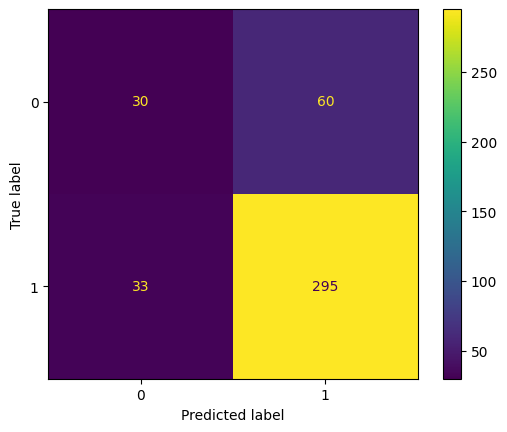

In [ ]:
# KNN
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,knn.predict(x_test)),display_labels=knn.classes_)
cm.plot()
f1_score(y_test,knn.predict(x_test))

0.8952095808383234

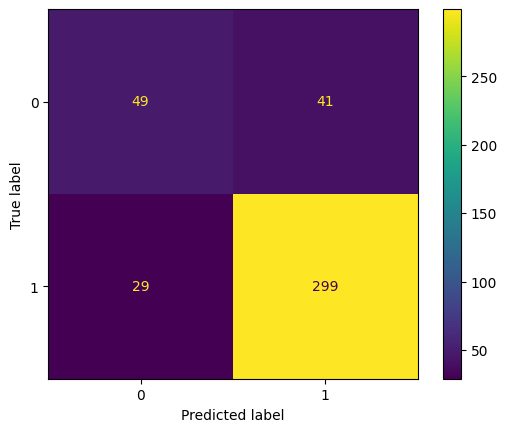

In [ ]:
# LogesticRegression
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,lg.predict(x_test)),display_labels=lg.classes_)
cm.plot()
f1_score(y_test,lg.predict(x_test))#,pos_label="Yes")

0.8486739469578783

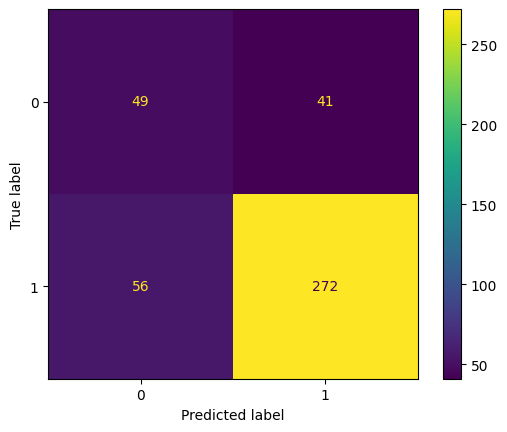

In [ ]:
# Decision Tree
ConfusionMatrixDisplay(confusion_matrix(y_test,dt.predict(x_test)),display_labels=dt.classes_).plot()
f1_score(y_test,dt.predict(x_test))#,pos_label="Yes")

0.8998505231689088

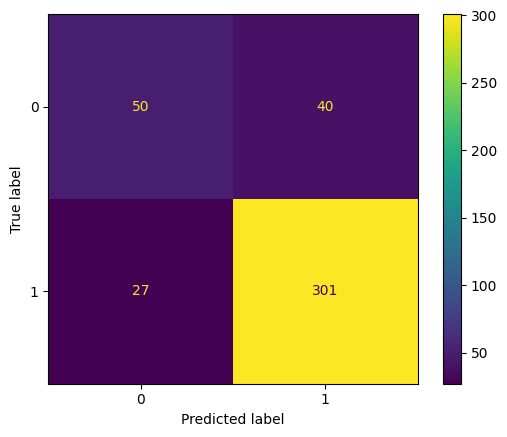

In [ ]:
# Random Forest
ConfusionMatrixDisplay(confusion_matrix(y_test,rf.predict(x_test)),display_labels=rf.classes_).plot()
f1_score(y_test,rf.predict(x_test))

0.8805369127516779

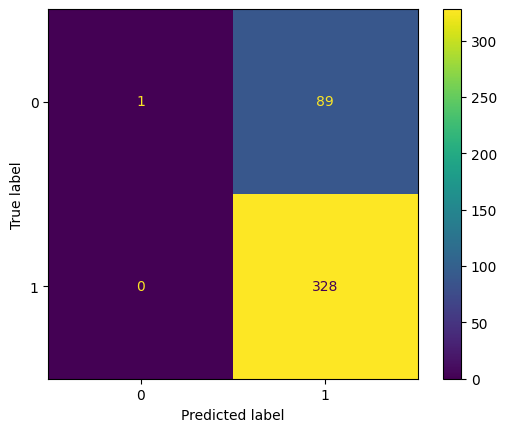

In [ ]:
# SVC
ConfusionMatrixDisplay(confusion_matrix(y_test,svc.predict(x_test)),display_labels=svc.classes_).plot()
f1_score(y_test,svc.predict(x_test))#,pos_label="Yes")

0.878419452887538

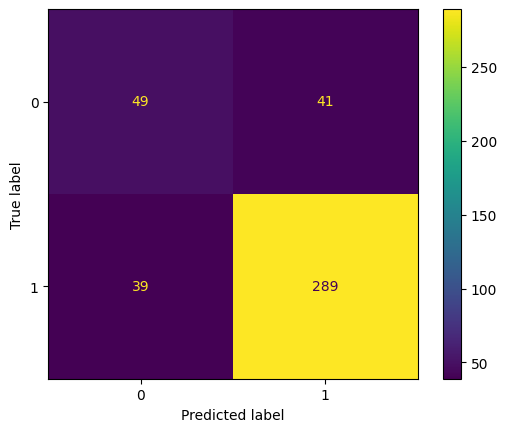

In [ ]:
# XGboost
ConfusionMatrixDisplay(confusion_matrix(y_test,xgb.predict(x_test)),display_labels=xgb.classes_).plot()
f1_score(y_test,xgb.predict(x_test))

In [ ]:
# import pickle
# with open("xgboost_model.pkl",'wb') as file:
#     pickle.dump(xgb,file)

0.8502994011976048

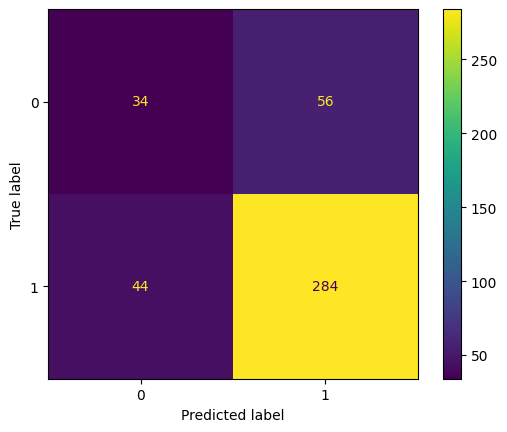

In [ ]:
# Multinimial NB
ConfusionMatrixDisplay(confusion_matrix(y_test,mnb.predict(x_test)),display_labels=mnb.classes_).plot()
f1_score(y_test,mnb.predict(x_test))#,pos_label="Yes")

Here after checking the Evaluation metric the only few algorithms are returning the more f1_score
- Logestic Regression
- Random Forest
- XGBoost

### Optuna

In [ ]:
!pip install optuna
import optuna
from sklearn.model_selection import KFold,cross_val_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 24.3 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier

def ob_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 27,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=27)
    score = cross_val_score(model, x, y, scoring='f1', cv=kf, n_jobs=-1).mean()
    return score

study=optuna.create_study(direction='maximize')
study.optimize(ob_xgb,n_trials=50,show_progress_bar=True)


[I 2025-04-22 11:53:44,535] A new study created in memory with name: no-name-3719ad01-1d14-4b25-9f4f-2888b0ed1502


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-04-22 11:53:45,065] Trial 0 finished with value: 0.8842424471644492 and parameters: {'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.08160107385122974, 'subsample': 0.6148178673098619, 'colsample_bytree': 0.784563120155049, 'gamma': 3.840081746357406, 'reg_alpha': 0.7477430535494597, 'reg_lambda': 0.42590134754704456}. Best is trial 0 with value: 0.8842424471644492.
[I 2025-04-22 11:53:45,913] Trial 1 finished with value: 0.8808304657767746 and parameters: {'n_estimators': 214, 'max_depth': 15, 'learning_rate': 0.19107222326102283, 'subsample': 0.8926168858732584, 'colsample_bytree': 0.6007067957908063, 'gamma': 1.8171784341308073, 'reg_alpha': 0.5804673958445885, 'reg_lambda': 0.26127772595282506}. Best is trial 0 with value: 0.8842424471644492.
[I 2025-04-22 11:53:46,602] Trial 2 finished with value: 0.8738238433519576 and parameters: {'n_estimators': 55, 'max_depth': 13, 'learning_rate': 0.21908179703715902, 'subsample': 0.655842822137146, 'colsample_bytree': 0.522097

In [ ]:
print(study.best_params)
print('f1_score',study.best_value)
# study.best_trials
# study.best_params
xgb_best_params=study.best_params

{'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.22374567303994278, 'subsample': 0.638049035311606, 'colsample_bytree': 0.5346931957713963, 'gamma': 3.5030069251175533, 'reg_alpha': 0.7367495566928474, 'reg_lambda': 0.4233179364462049}
f1_score 0.885430065737957


In [ ]:
def ob_logistic(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_float('C', 1e-3, 10.0, log=True)

    model = LogisticRegression(
        solver='liblinear',
        penalty=penalty,
        C=C,
        max_iter=3000,
        random_state=27
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=27)
    score = cross_val_score(model, x, y, scoring='f1', cv=kf, n_jobs=-1).mean()
    return score

study=optuna.create_study(direction='maximize')
study.optimize(ob_logistic,n_trials=50,show_progress_bar=True)

[I 2025-04-22 11:54:21,626] A new study created in memory with name: no-name-74ffe12c-c5d0-4702-862b-6e6cc9081c1a


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-04-22 11:54:21,717] Trial 0 finished with value: 0.88156886867258 and parameters: {'penalty': 'l2', 'C': 0.048923189618189145}. Best is trial 0 with value: 0.88156886867258.
[I 2025-04-22 11:54:21,807] Trial 1 finished with value: 0.8816936349608142 and parameters: {'penalty': 'l1', 'C': 6.34258414756926}. Best is trial 1 with value: 0.8816936349608142.
[I 2025-04-22 11:54:21,884] Trial 2 finished with value: 0.8693313388635311 and parameters: {'penalty': 'l1', 'C': 0.010064498204404124}. Best is trial 1 with value: 0.8816936349608142.
[I 2025-04-22 11:54:21,984] Trial 3 finished with value: 0.8796021163471666 and parameters: {'penalty': 'l1', 'C': 0.3129990320990504}. Best is trial 1 with value: 0.8816936349608142.
[I 2025-04-22 11:54:22,054] Trial 4 finished with value: 0.8704716068088167 and parameters: {'penalty': 'l1', 'C': 0.008129056382257136}. Best is trial 1 with value: 0.8816936349608142.
[I 2025-04-22 11:54:22,115] Trial 5 finished with value: 0.871795195023482 and p

In [ ]:
print(study.best_params)
print(study.best_value)

{'penalty': 'l2', 'C': 0.02134899597792758}
0.8837668518633075


In [ ]:
def ob_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'random_state': 27
    }

    model = RandomForestClassifier(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=27)
    score = cross_val_score(model, x, y, scoring='accuracy', cv=kf, n_jobs=-1).mean()
    return score
study=optuna.create_study(direction='maximize')
study.optimize(ob_logistic,n_trials=50,show_progress_bar=True)

[I 2025-04-22 11:54:42,961] A new study created in memory with name: no-name-9092e3ca-b089-4c4f-bc48-6a70943dfcda


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-04-22 11:54:43,029] Trial 0 finished with value: 0.8801008162667532 and parameters: {'penalty': 'l2', 'C': 0.5361840020610258}. Best is trial 0 with value: 0.8801008162667532.
[I 2025-04-22 11:54:43,067] Trial 1 finished with value: 0.8700175638328421 and parameters: {'penalty': 'l1', 'C': 0.007284595133482404}. Best is trial 0 with value: 0.8801008162667532.
[I 2025-04-22 11:54:43,139] Trial 2 finished with value: 0.8816936349608142 and parameters: {'penalty': 'l1', 'C': 2.1302541801450356}. Best is trial 2 with value: 0.8816936349608142.
[I 2025-04-22 11:54:43,187] Trial 3 finished with value: 0.8833523373317087 and parameters: {'penalty': 'l1', 'C': 0.02433529570559305}. Best is trial 3 with value: 0.8833523373317087.
[I 2025-04-22 11:54:43,241] Trial 4 finished with value: 0.8828727192345879 and parameters: {'penalty': 'l1', 'C': 0.04377837957635131}. Best is trial 3 with value: 0.8833523373317087.
[I 2025-04-22 11:54:43,280] Trial 5 finished with value: 0.8639478330696042 

In [ ]:
print(study.best_params)
print(study.best_value)

{'penalty': 'l1', 'C': 0.02522774708821094}
0.8838812158209712


After performing the Hyper parameter tunning through Optuna the xgboost is returning the more f1_score so i want to choose the xgboost algorithm for my model and the best parameters are <br><br>
-XGBoost _best_parameters = {'n_estimators': 247,<br>
 'max_depth': 11,<br>
 'learning_rate': 0.09142940159241424,<br>
 'subsample': 0.6025652704168243,<br>
 'colsample_bytree': 0.5261490442423129,<br>
 'gamma': 4.1231722373621995,<br>
 'reg_alpha': 0.333491836650897,<br>
 'reg_lambda': 0.10793240398068174}


### Model Application

In [ ]:
xgb=XGBClassifier(**xgb_best_params,random_state=27)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5346931957713963, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.5030069251175533,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22374567303994278,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=217, n_jobs=None,
              num_parallel_tree=None, random_state=27, ...)

In [ ]:
y_predict=xgb.predict(x_test)

In [ ]:
f1_score(y_test,y_predict)

0.8945022288261516

In [ ]:
l=eval(input())
#Convert tuple l to a list
l = list(l)
for i in range(len(l)):
    for j in range(i+1):
        if str(l[j]).isnumeric() == True and str(l[i]).isnumeric()==True:
            if l[i]<l[j]:
                l[i],l[j]=l[j],l[i]
        else:
            print("enter no's list")
l=eval(input())
#Convert tuple l to a list
l = list(l)
for i in range(len(l)):
    for j in range(i+1):
        if str(l[j]).isnumeric() and str(l[i]).isnumeric():
            if l[i]<l[j]:
                l[i],l[j]=l[j],l[i]
        else:
            print("enter no's list")
            break
    else:
        continue
    break
l
# %% [code]
l=eval(input())
#Convert tuple l to a list
l = list(l)
min=max=l[0]
for i in l:
    if min>i:
        min=i
    if max<i:
        max=i
print(min,max)

[10, 5, 20, 15, 30]
[1, 2, 'a', 4, 5]
enter no's list
[10, 20, 30, 40, 50]
10 50


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.8 MB/s eta 0:00:00


In [ ]:
import pickle
with open("xgboost_model.pkl",'wb') as file:
    pickle.dump(xgb,file)

In [110]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model and encoder
with open("xgboost_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)
with open("encoder.pkl", "rb") as encoder_file:
    encoder = pickle.load(encoder_file)

# Create the Streamlit app
st.title("Mental Health Risk Prediction")
st.write("Enter the following information to predict the risk of mental health issues:")

# Input fields
family_history = st.selectbox("Family History", ["No", "Yes"])
work_hours = st.slider("Work Hours", 0, 24, 8)
sleep_hours = st.slider("Sleep Hours", 0, 24, 7)
social_interaction = st.slider("Social Interaction", 0, 10, 5)
physical_activity = st.slider("Physical Activity", 0, 10, 3)
stress_level = st.slider("Stress Level", 0, 10, 5)
diet_quality = st.selectbox("Diet Quality", ["Poor", "Average", "Good"])

# Create a dictionary with the input values
input_data = {
    "Family History": ["No"],
    "Work Hours": [7],
    "Sleep Hours": [8],
    "Social Interaction": [7],
    "Physical Activity": [5],
    "Stress Level": [3],
    "Diet Quality": ["Good"]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Encode the input data
encoded_data = encoder.transform(input_df)

# Make a prediction
prediction = model.predict(encoded_data)[0]

# Display the prediction
if prediction == 1:
    st.error("High Risk of Mental Health Issues")
else:
    st.success("Low Risk of Mental Health ")

Overwriting app.py


In [111]:
!wget -q -O - ipv4.icanhazip.com

35.236.153.154


In [112]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.153.154:8501

⠸⠼⠴your url is: https://itchy-pianos-look.loca.lt
  Stopping...
^C
